In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
import joblib


In [28]:
df = pd.read_csv('./data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.isnull().sum().max()

0

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
# Understand the distribution of the target variable
print(df['Class'].value_counts())

0    284315
1       492
Name: Class, dtype: int64


In [9]:
type(df['Class'].value_counts())

pandas.core.series.Series

In [29]:
# Creating a DataFrame
class_counts_df = pd.DataFrame({
    'Class': ['non-fradulent', 'fradulent'],
    'Values': [df['Class'].value_counts()[0], df['Class'].value_counts()[1]]})

/var/folders/n3/jhw9z8757c53pxf50v6qm8hw0000gn/T/ipykernel_82929/1592047682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Class', y='Values', data=class_counts_df, palette=['skyblue', 'red'])


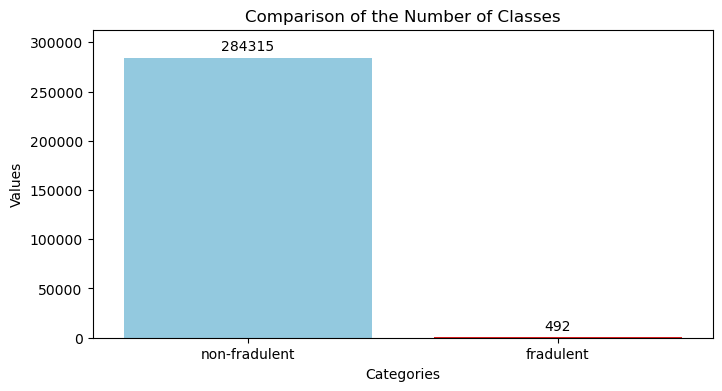

In [30]:
# Creating the barplot
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='Class', y='Values', data=class_counts_df, palette=['skyblue', 'red'])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of the Number of Classes')

# Find the maximum value to adjust y limits accordingly
max_value = class_counts_df['Values'].max()
plt.ylim(0, max_value + 0.1 * max_value)  # Increase upper limit by 10% of the max value

# Annotate the number of samples in each class
for p in bar_plot.patches:  # iterate through the list of bars
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=10, xytext = (0, 8), 
                       textcoords = 'offset points')

plt.show()

Observing the distributions allows us to understand the skewness of the classes. We have to implement techniques to reduce skewness in these distributions.

/var/folders/n3/jhw9z8757c53pxf50v6qm8hw0000gn/T/ipykernel_82929/350226092.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['${:,.0f}'.format(y) for y in ax.get_yticks()])


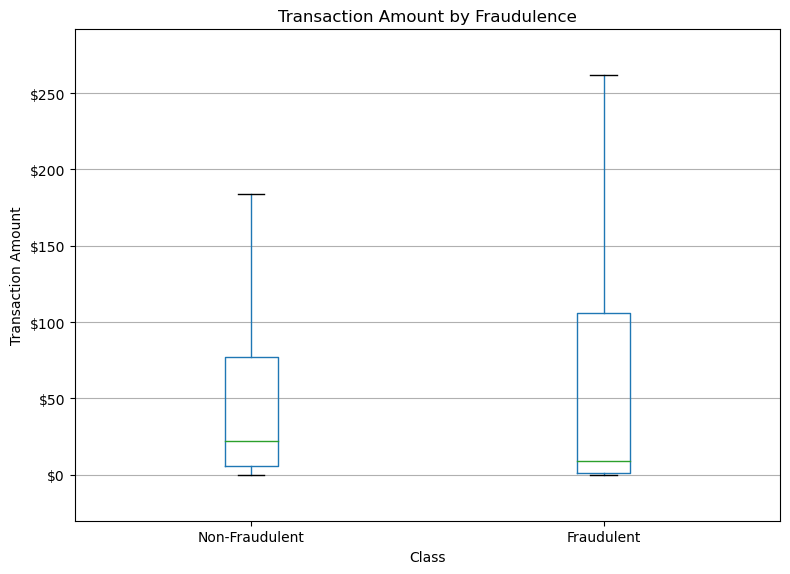

In [31]:
# Calculate quartiles and IQR to set appropriate y-axis limits
q1 = np.percentile(df['Amount'], 25)
q3 = np.percentile(df['Amount'], 75)
iqr = q3 - q1

# Define bounds to zoom in closer around the quartiles, reducing the range to focus on main data
lower_bound = q1 - 0.5 * iqr
upper_bound = q3 + 3 * iqr

# Create the boxplots without outliers
fig, ax = plt.subplots(figsize=(8, 6))
df.boxplot(column='Amount', by='Class', ax=ax, showfliers=False)

# Adding titles and labels
plt.title('Transaction Amount by Fraudulence')
plt.suptitle('')  # Suppress the automatic title
plt.ylabel('Transaction Amount')

# Change x-axis labels from '0', '1' to 'Non-Fraudulent', 'Fraudulent'
ax.set_xticklabels(['Non-Fraudulent', 'Fraudulent'])

# Format y-axis to show dollar signs and set y-axis limits to focus around the IQR
ax.set_yticklabels(['${:,.0f}'.format(y) for y in ax.get_yticks()])
plt.ylim(lower_bound, upper_bound)

# Remove vertical grid lines
ax.xaxis.grid(False)  # Disable x-axis grid lines
ax.yaxis.grid(True)   # Keep y-axis grid lines for better readability

# Show plot
plt.tight_layout()
plt.show()

It is crucial to construct a balanced subset of our data, containing an equal number of fraud and non-fraud transactions. This approach helps our models in better recognizing patterns that indicate fraudulent activities. In our context, a balanced subsample is a dataset with an equal proportion of fraud and non-fraud transactions, achieving a 50/50 ratio. This ensures our sample has an even representation of both classes.
More precisely, There are 492 cases of fraud in our dataset so we can randomly get 492 cases of non-fraud to create our new sub dataframe. We concat the 492 cases of fraud and non fraud, creating a new sub-sample.

In [32]:
scaler = StandardScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

# Move Class column to the end
cols = [col for col in df if col != 'Class'] + ['Class']
df = df[cols]

In [14]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541,0


In [198]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,-1.996583,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,-1.996583,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,-1.996562,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,-1.996562,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,-1.996541,0


In this stage of the project, we will apply "Random Under Sampling," to achieve a more balanced dataset, helping with preventing overfitting.

In [33]:
# Shuffling the dataset
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

balanced_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = balanced_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
162463,2.021767,-0.148288,-1.095202,0.427179,-0.174631,-1.135588,0.156449,-0.283922,0.616551,0.072483,...,-0.726449,0.338885,-0.026577,-0.336927,0.201071,-0.074007,-0.058790,-0.281304,0.428005,0
43061,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,-15.124163,...,-0.832074,-0.186117,0.429781,0.697103,0.056031,-1.310888,-0.707403,-0.216815,-1.125775,1
282803,-1.239944,-0.452182,-1.374217,-1.208559,3.126193,3.380477,-1.539754,0.129587,1.197928,-0.199964,...,0.311419,0.019920,0.675951,-2.561728,-0.004390,0.246262,0.360033,-0.175874,1.607733,0
238466,1.833191,0.745333,-1.133009,3.893556,0.858164,0.910235,-0.498200,0.344703,-0.667939,0.398155,...,0.181652,0.072981,-0.155299,-0.149891,0.012792,0.040854,0.022903,-0.283703,1.155283,1
122479,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,-2.921484,-6.561257,...,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,0.525550,-0.384073,1


Let's check if the number of samples in each class are equal.

/var/folders/n3/jhw9z8757c53pxf50v6qm8hw0000gn/T/ipykernel_82929/2458748591.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Class', y='Values', data=class_counts_df, palette=['skyblue', 'red'])


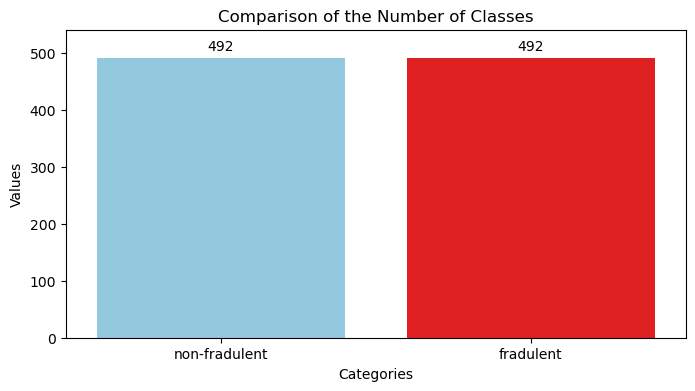

In [34]:
# Creating a DataFrame
class_counts_df = pd.DataFrame({
    'Class': ['non-fradulent', 'fradulent'],
    'Values': [balanced_df['Class'].value_counts()[0], balanced_df['Class'].value_counts()[1]]})

# Creating the barplot
plt.figure(figsize=(8, 4))
bar_plot = sns.barplot(x='Class', y='Values', data=class_counts_df, palette=['skyblue', 'red'])

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of the Number of Classes')

# Find the maximum value to adjust y limits accordingly
max_value = class_counts_df['Values'].max()
plt.ylim(0, max_value + 0.1 * max_value)  # Increase upper limit by 10% of the max value

# Annotate the number of samples in each class
for p in bar_plot.patches:  # iterate through the list of bars
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=10, xytext = (0, 8), 
                       textcoords = 'offset points')

plt.show()

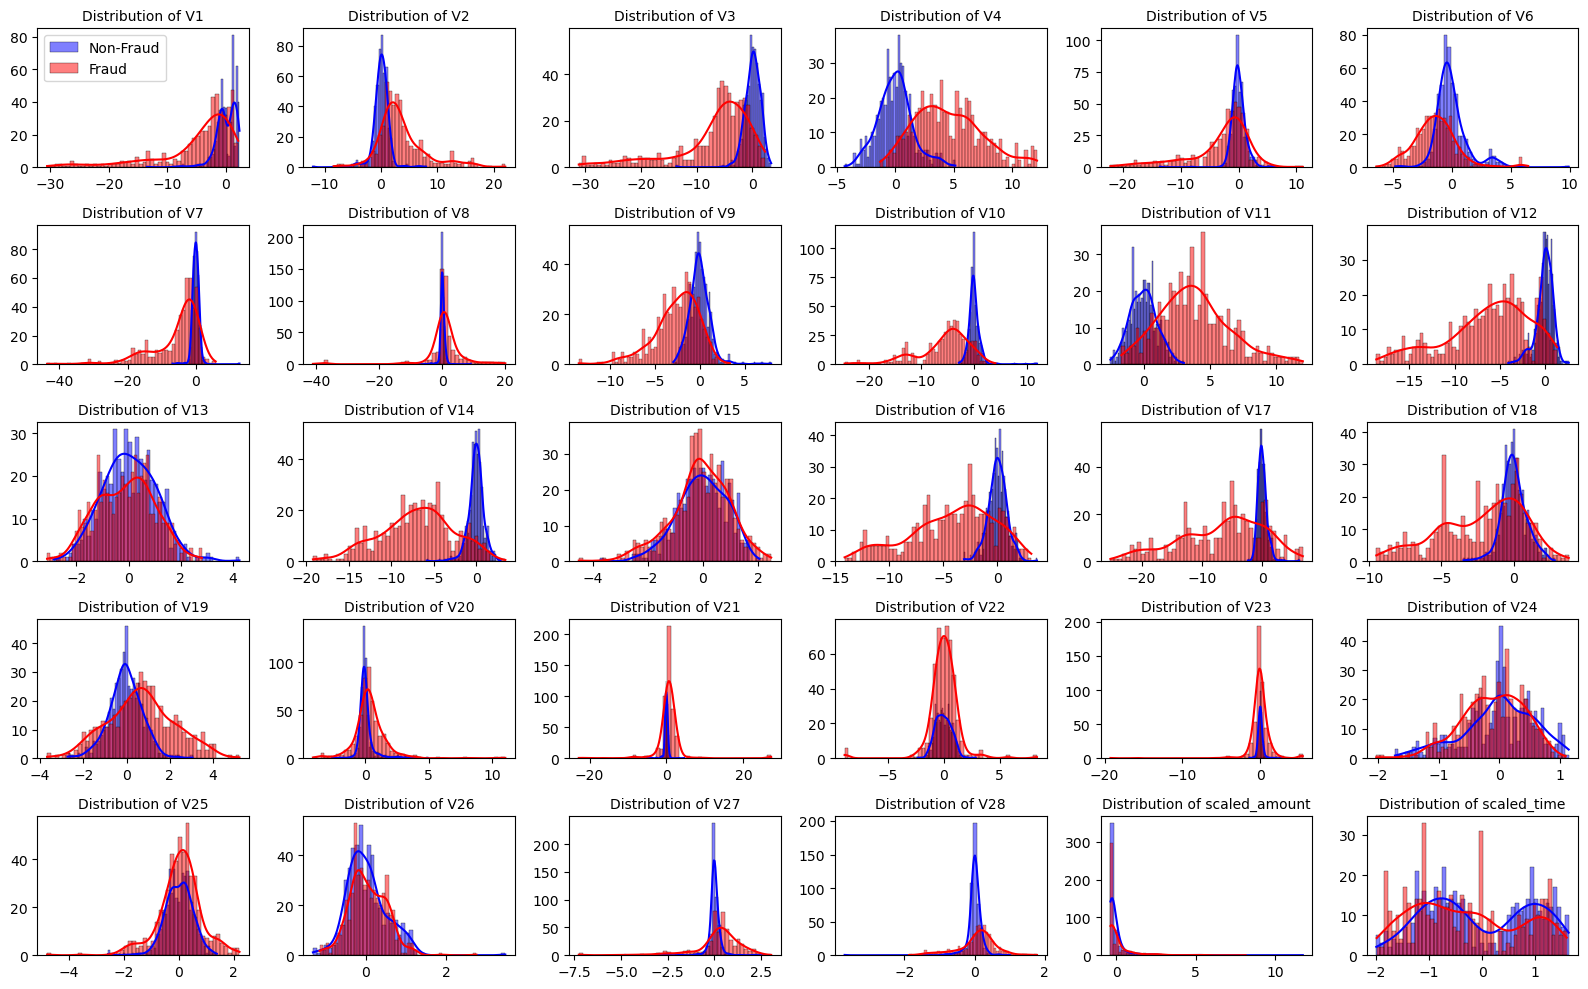

In [35]:
# Pre-compute class-specific datasets
non_fraud_df = new_df[new_df['Class'] == 0].drop('Class', axis=1)
fraud_df = new_df[new_df['Class'] == 1].drop('Class', axis=1)

# Setup the figure and axes
fig, axes = plt.subplots(5, 6, figsize=(16, 10))  # Adjust the grid dimensions based on the number of columns
axes = axes.flatten()  # Flatten the array for easy iteration

for i, col in enumerate(new_df.columns[:-1]):  # Assuming the last column is 'Class' and it's dropped
    sns.histplot(data=non_fraud_df[col], bins=50, kde=True, color='blue', ax=axes[i], label='Non-Fraud' if i == 0 else "")
    sns.histplot(data=fraud_df[col], bins=50, kde=True, color='red', ax=axes[i], label='Fraud' if i == 0 else "")
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel('')  # Clear x-labels to reduce clutter
    axes[i].set_ylabel('')  # Optionally clear y-labels for the same reason
    if i == 0:  # Add legend only to the first subplot
        axes[i].legend()

# Adjust layout to prevent label/title overlap
plt.tight_layout()
plt.show()

In [36]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# PCA Implementation
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)


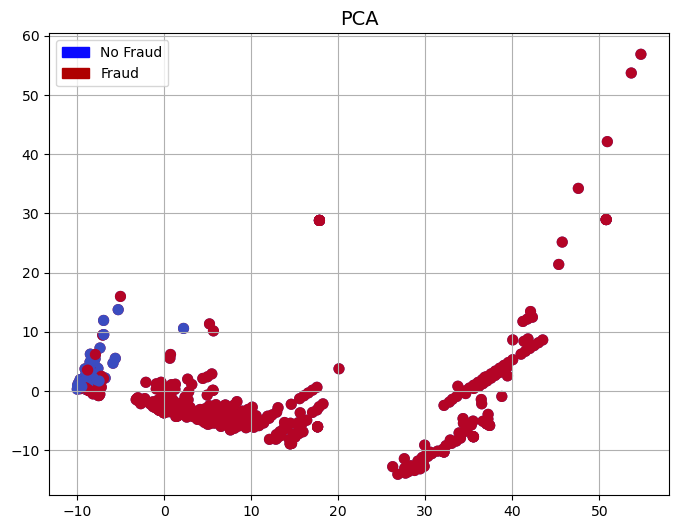

In [37]:
# PCA scatter plot
f, ax = plt.subplots(1, 1, figsize=(8, 6))  # Adjust the figsize as needed for a single plot

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('PCA', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

This plot shows us that classification models should perform well in distinguishing fraud cases from non-fraud cases.

Now we will train three types of classifiers (Random Forest, K-Nearest Neighbor, and XGBoost) and combine them using stacked generalization and evaluate their accuracy in detecting fraud transactions. In the first step, we have to split our data into training and testing sets and separate the features from the labels.

In [38]:
X = new_df.drop('Class', axis=1).values
y = new_df['Class'].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [205]:
(y_train == 1).sum()

382

In [209]:
(y_test == 0).sum()

87

Initially we have to hypertune the models using grid search.

In [7]:
# Parameters for Random Forest
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Parameters for K-Nearest Neighbors
knears_params = {
    'n_neighbors': list(range(2, 5, 1)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Parameters for XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9]
}

# Setup GridSearchCV for Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
rf_best = grid_rf.best_estimator_

# Setup GridSearchCV for K-Nearest Neighbors
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_knears.fit(X_train, y_train)
knears_best = grid_knears.best_estimator_

# Setup GridSearchCV for XGBoost
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42), xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
xgb_best = grid_xgb.best_estimator_


In [39]:
joblib.dump(rf_best, './_extra/rf_best.joblib')

['./_extra/rf_best.joblib']

In [40]:
joblib.dump(knears_best, './_extra/knears_best.joblib')

['./_extra/knears_best.joblib']

In [41]:
joblib.dump(xgb_best, './_extra/xgb_best.joblib')

['./_extra/xgb_best.joblib']

Now, we evaluate the trained models based on their test dataset.

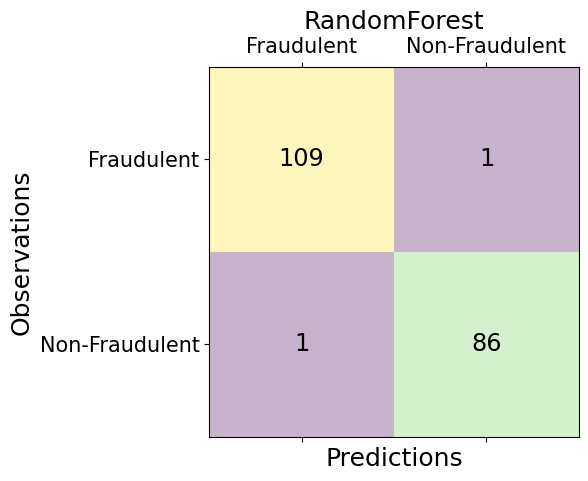

Classifiers:  RandomForest has 0.99 accuracy
Classifiers:  RandomForest has 0.99 precision
Classifiers:  RandomForest has 0.99 recall
Classifiers:  RandomForest has 0.99 f1 score


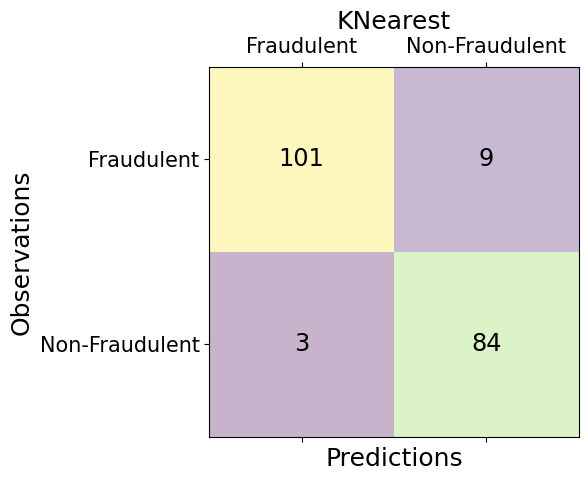

Classifiers:  KNearest has 0.94 accuracy
Classifiers:  KNearest has 0.97 precision
Classifiers:  KNearest has 0.92 recall
Classifiers:  KNearest has 0.94 f1 score


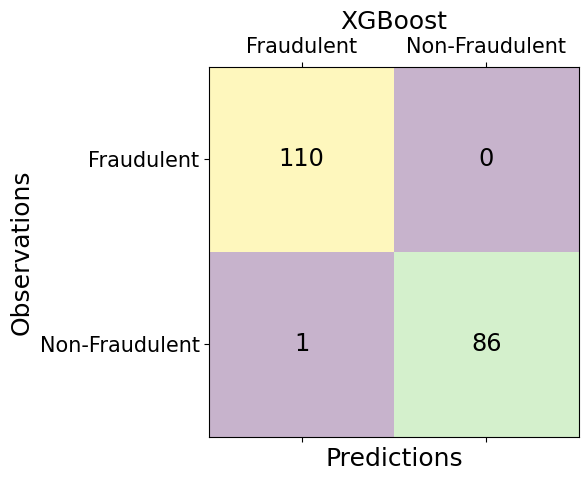

Classifiers:  XGBoost has 0.99 accuracy
Classifiers:  XGBoost has 0.99 precision
Classifiers:  XGBoost has 1.0 recall
Classifiers:  XGBoost has 1.0 f1 score


In [42]:
classifiers = {
    "RandomForest": rf_best,
    "KNearest": knears_best,
    "XGBoost": xgb_best
    }

for key, classifier in classifiers.items():

    y_pred = classifier.predict(X_test)

    # Calculating performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix using Matplotlib
    fig, ax = plt.subplots()
    ax.matshow(cm, cmap='viridis', alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')

    # Correcting the axis inversion
    ax.invert_xaxis()
    ax.invert_yaxis()

    # Setting tick positions explicitly
    ax.set_xticks([0, 1])  # Assuming there are two classes
    ax.set_yticks([0, 1])

    # Adding corrected labels
    labels = ['Non-Fraudulent', 'Fraudulent']  # Correcting typo in 'Fraudulent'
    ax.set_xticklabels(labels, fontsize=15)
    ax.set_yticklabels(labels, fontsize=15)

    # Adding axis labels and title
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Observations', fontsize=18)
    plt.title(key, fontsize=18)

    plt.show()
    
    print("Classifiers: ", key, "has", round(accuracy, 2), "accuracy")
    print("Classifiers: ", key, "has", round(precision, 2), "precision")
    print("Classifiers: ", key, "has", round(recall, 2), "recall")
    print("Classifiers: ", key, "has", round(f1, 2), "f1 score")


RandomForest Metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


KNearest Metrics:
Accuracy: 0.94
Precision: 0.97
Recall: 0.92
F1 Score: 0.94


XGBoost Metrics:
Accuracy: 0.99
Precision: 0.99
Recall: 1.0
F1 Score: 1.0




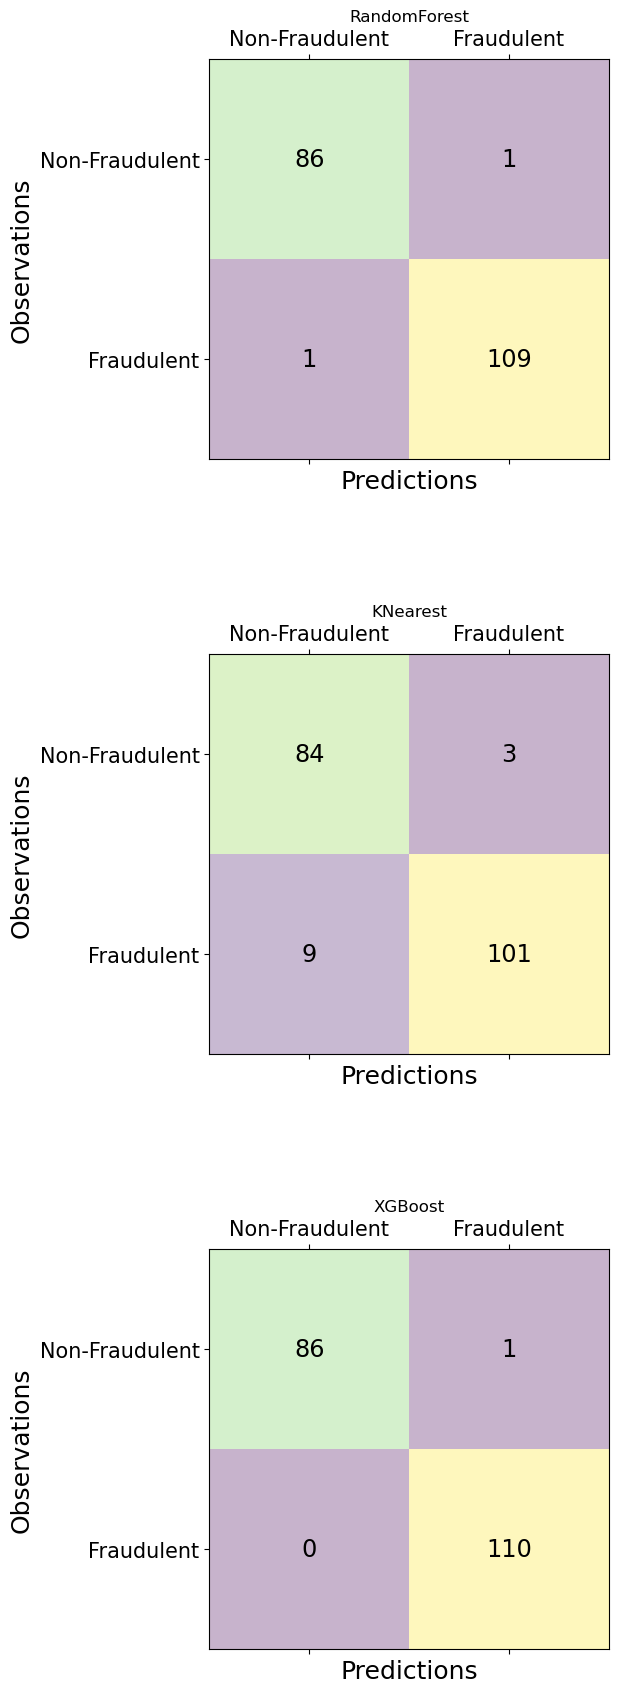

In [43]:
# Puting the cofusion matrix together

classifiers = {
    "RandomForest": rf_best,
    "KNearest": knears_best,
    "XGBoost": xgb_best
}

# Create a single figure with subplots arranged vertically
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 18))  # Adjust the figure size as needed

for ax, (key, classifier) in zip(axes.flatten(), classifiers.items()):
    y_pred = classifier.predict(X_test)
    
    # Calculating performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix
    ax.matshow(cm, cmap='viridis', alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')

    # Setting tick positions and labels explicitly
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    labels = ['Non-Fraudulent', 'Fraudulent']
    ax.set_xticklabels(labels, fontsize=15)
    ax.set_yticklabels(labels, fontsize=15)

    # Adding axis labels and title
    ax.set_xlabel('Predictions', fontsize=18)
    ax.set_ylabel('Observations', fontsize=18)
    ax.set_title(f"{key}")

# Display metrics below each plot
    print(f"{key} Metrics:")
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1 Score:", round(f1, 2))
    print("\n")  # Add a newline for better spacing

plt.tight_layout()
plt.show()

In [22]:
cm

array([[83,  4],
       [14, 96]])

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = conf_matrix.ravel()

In [21]:
print(tn, fp, fn, tp)

83 4 14 96


Now, let's train and evaluate the stacked model.

In [44]:
# Meta-classifier
lr = LogisticRegression(random_state=42)

# Stacking classifier
stack_clf = StackingClassifier(classifiers=[rf_best, knears_best, xgb_best], meta_classifier=lr)
stack_clf.fit(X_train, y_train)


StackingClassifier(classifiers=[RandomForestClassifier(max_depth=10,
                                                       random_state=42),
                                KNeighborsClassifier(n_neighbors=3),
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None...
                                              interaction_constraints=None,
                                              learning_rate=0.2, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=5,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)],
                   meta_classifier=LogisticRegression(random_state=42))

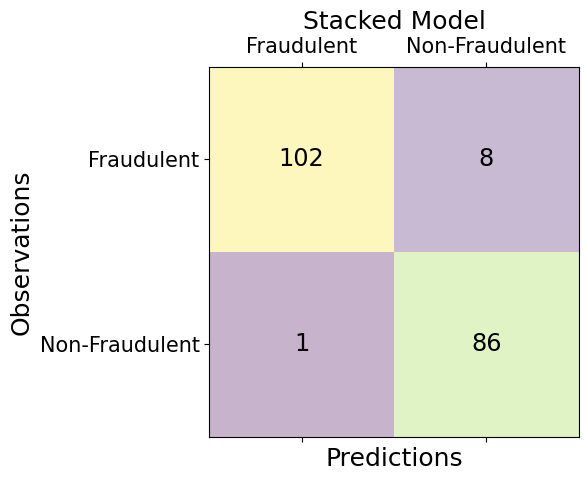

Classifiers:  Stacked Model has 0.95 accuracy
Classifiers:  Stacked Model has 0.99 precision
Classifiers:  Stacked Model has 0.93 recall
Classifiers:  Stacked Model has 0.96 f1 score


In [45]:
classifiers = {
    "Stacked Model": stack_clf
    }

for key, classifier in classifiers.items():

    y_pred = classifier.predict(X_test)

    # Calculating performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Plotting the confusion matrix using Matplotlib
    fig, ax = plt.subplots()
    ax.matshow(cm, cmap='viridis', alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')

    # Correcting the axis inversion
    ax.invert_xaxis()
    ax.invert_yaxis()

    # Setting tick positions explicitly
    ax.set_xticks([0, 1])  # Assuming there are two classes
    ax.set_yticks([0, 1])

    # Adding corrected labels
    labels = ['Non-Fraudulent', 'Fraudulent']  # Correcting typo in 'Fraudulent'
    ax.set_xticklabels(labels, fontsize=15)
    ax.set_yticklabels(labels, fontsize=15)

    # Adding axis labels and title
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Observations', fontsize=18)
    plt.title(key, fontsize=18)

    plt.show()
    
    print("Classifiers: ", key, "has", round(accuracy, 2), "accuracy")
    print("Classifiers: ", key, "has", round(precision, 2), "precision")
    print("Classifiers: ", key, "has", round(recall, 2), "recall")
    print("Classifiers: ", key, "has", round(f1, 2), "f1 score")

Now, let's plot ROC curve

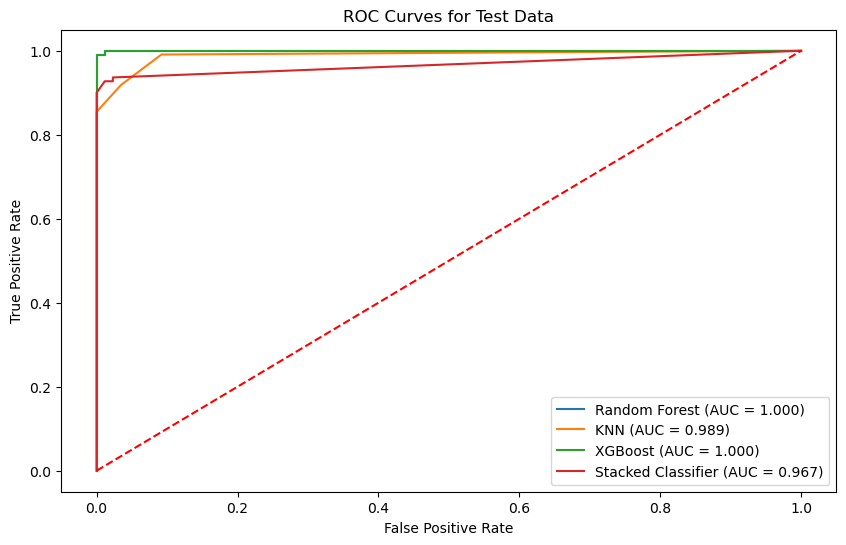

In [46]:
rf_probs_test = rf_best.predict_proba(X_test)[:, 1]
knears_probs_test = knears_best.predict_proba(X_test)[:, 1]
xgb_probs_test = xgb_best.predict_proba(X_test)[:, 1]
stack_probs_test = stack_clf.predict_proba(X_test)[:, 1]

rf_fpr_test, rf_tpr_test, _ = roc_curve(y_test, rf_probs_test)
knears_fpr_test, knears_tpr_test, _ = roc_curve(y_test, knears_probs_test)
xgb_fpr_test, xgb_tpr_test, _ = roc_curve(y_test, xgb_probs_test)
stack_fpr_test, stack_tpr_test, _ = roc_curve(y_test, stack_probs_test)

def plot_roc_curve():
    plt.figure(figsize=(10, 6))
    plt.plot(rf_fpr_test, rf_tpr_test, label='Random Forest (AUC = %0.3f)' % roc_auc_score(y_test, rf_probs_test))
    plt.plot(knears_fpr_test, knears_tpr_test, label='KNN (AUC = %0.3f)' % roc_auc_score(y_test, knears_probs_test))
    plt.plot(xgb_fpr_test, xgb_tpr_test, label='XGBoost (AUC = %0.3f)' % roc_auc_score(y_test, xgb_probs_test))
    plt.plot(stack_fpr_test, stack_tpr_test, label='Stacked Classifier (AUC = %0.3f)' % roc_auc_score(y_test, stack_probs_test))
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Test Data')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve()

It seems like although the stacked model has higher accuracy, precision, recall, and f1_score, the Random Forest and XGBoost have higher AUC.

Now, let's apply the models to the whole dataset.

In [215]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time,Class
43470,-1.288475,-0.259731,2.675814,0.149939,0.971450,0.600657,-0.314156,0.440312,0.330171,-0.491381,...,0.038701,-0.271463,-0.707128,0.372642,-0.449845,-0.098060,-0.152953,-0.347272,-1.122216,0
280651,0.199689,0.860422,-0.638864,-0.197413,0.049001,-1.161767,0.541627,0.131042,-0.068217,-0.642541,...,1.075011,-0.059455,-0.086545,-0.253731,-0.142906,-0.088865,-0.073929,-0.265311,1.576210,0
170008,1.886803,-0.065455,-1.824313,0.593472,0.108229,-1.455115,0.402970,-0.423951,0.563375,-0.518014,...,0.693888,-0.109530,-0.079472,0.233011,-0.109771,-0.018626,-0.015671,0.022591,0.529715,0
161514,-0.276694,0.591388,1.241006,0.346149,-0.503591,-1.112451,-0.030207,-0.100015,0.534450,-0.751645,...,0.561551,0.199717,0.862150,-1.295634,0.030138,-0.076791,0.191510,-0.274867,0.409559,0
152993,-0.487453,1.026443,2.383710,4.240033,0.820066,1.962470,0.119491,0.205700,-0.640505,1.237434,...,0.378763,-0.268433,0.011127,0.178841,0.488351,-0.111626,-0.134272,-0.090755,0.061555,0


In [47]:
# New_df is from the random undersample data (fewer instances)
X = df.drop('Class', axis=1).values
y = df['Class'].values

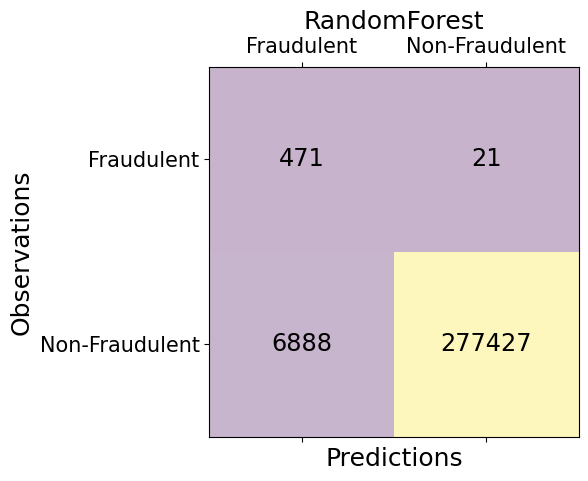

Classifiers:  RandomForest has 0.98 accuracy
Classifiers:  RandomForest has 0.06 precision
Classifiers:  RandomForest has 0.96 recall
Classifiers:  RandomForest has 0.12 f1 score


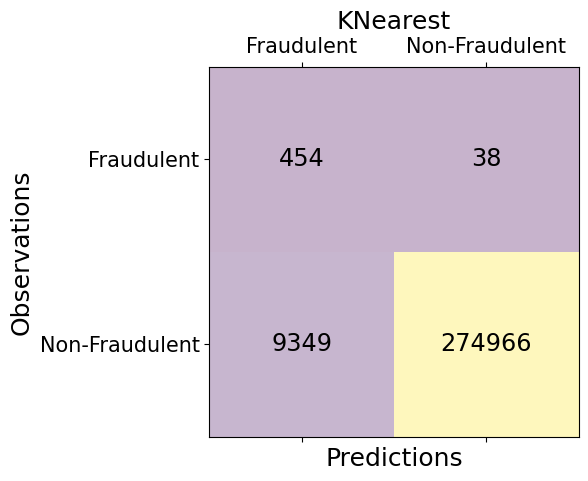

Classifiers:  KNearest has 0.97 accuracy
Classifiers:  KNearest has 0.05 precision
Classifiers:  KNearest has 0.92 recall
Classifiers:  KNearest has 0.09 f1 score


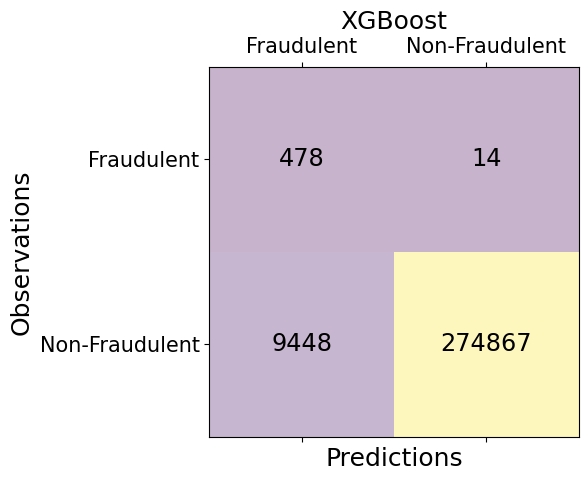

Classifiers:  XGBoost has 0.97 accuracy
Classifiers:  XGBoost has 0.05 precision
Classifiers:  XGBoost has 0.97 recall
Classifiers:  XGBoost has 0.09 f1 score


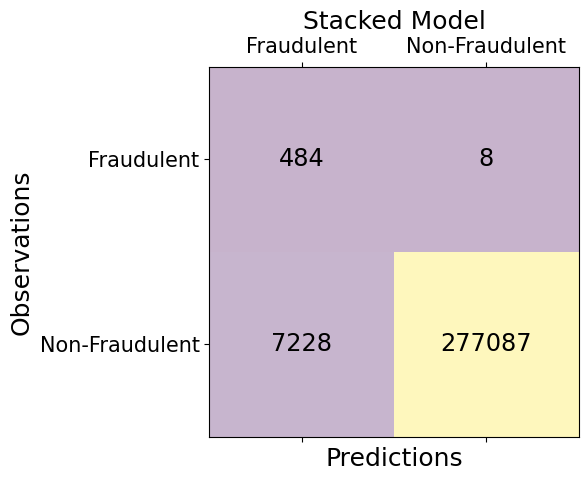

Classifiers:  Stacked Model has 0.97 accuracy
Classifiers:  Stacked Model has 0.06 precision
Classifiers:  Stacked Model has 0.98 recall
Classifiers:  Stacked Model has 0.12 f1 score


In [48]:
classifiers = {
    "RandomForest": rf_best,
    "KNearest": knears_best,
    "XGBoost": xgb_best,
    "Stacked Model": stack_clf
    }

for key, classifier in classifiers.items():

    y_pred = classifier.predict(X)

    # Calculating performance metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)

    # Plotting the confusion matrix using Matplotlib
    fig, ax = plt.subplots()
    ax.matshow(cm, cmap='viridis', alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='xx-large')

    # Correcting the axis inversion
    ax.invert_xaxis()
    ax.invert_yaxis()

    # Setting tick positions explicitly
    ax.set_xticks([0, 1])  # Assuming there are two classes
    ax.set_yticks([0, 1])

    # Adding corrected labels
    labels = ['Non-Fraudulent', 'Fraudulent'] 
    ax.set_xticklabels(labels, fontsize=15)
    ax.set_yticklabels(labels, fontsize=15)

    # Adding axis labels and title
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Observations', fontsize=18)
    plt.title(key, fontsize=18)

    plt.show()
    
    print("Classifiers: ", key, "has", round(accuracy, 2), "accuracy")
    print("Classifiers: ", key, "has", round(precision, 2), "precision")
    print("Classifiers: ", key, "has", round(recall, 2), "recall")
    print("Classifiers: ", key, "has", round(f1, 2), "f1 score")


Fortunately, the accuracy of the models applied to the whole dataset is satisfactory.

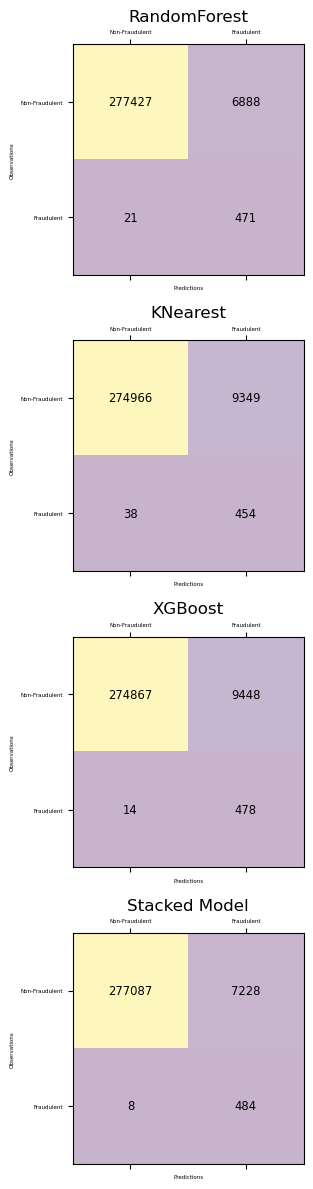

In [51]:
classifiers = {
    "RandomForest": rf_best,
    "KNearest": knears_best,
    "XGBoost": xgb_best,
    "Stacked Model": stack_clf
    }

# Create a single figure with subplots arranged vertically
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(4, 12))  # Adjust the figure size as needed

for ax, (key, classifier) in zip(axes.flatten(), classifiers.items()):
    y_pred = classifier.predict(X)
    
    # Calculating performance metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)

    # Plotting the confusion matrix
    ax.matshow(cm, cmap='viridis', alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center', size='small')

    # Setting tick positions and labels explicitly
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    labels = ['Non-Fraudulent', 'Fraudulent']
    ax.set_xticklabels(labels, fontsize=4)
    ax.set_yticklabels(labels, fontsize=4)

    # Adding axis labels and title
    ax.set_xlabel('Predictions', fontsize=4)
    ax.set_ylabel('Observations', fontsize=4)
    ax.set_title(f"{key}")

# Display metrics below each plot
    # print(f"{key} Metrics:")
    # print("Accuracy:", round(accuracy, 2))
    # print("Precision:", round(precision, 2))
    # print("Recall:", round(recall, 2))
    # print("F1 Score:", round(f1, 2))
    # print("\n")  # Add a newline for better spacing

plt.tight_layout()
plt.show()